## Compreendendo a regressão no Machine Learning

Regressão em machine learning é um tipo de técnica de modelagem preditiva. Ela investiga a relação entre uma variável dependente (alvo) e uma ou mais variáveis ​​independentes (preditoras). O objetivo é modelar a relação subjacente entre essas variáveis ​​para que, dados novos para as variáveis ​​independentes, possamos prever com precisão a variável dependente.

### Propósito da Regressão

O propósito principal da regressão é prever valores contínuos. Por exemplo, prever preços de casas, temperatura, valores de vendas e mais, com base em dados históricos e nas relações identificadas entre variáveis.

### Como funciona

A regressão funciona ajustando uma linha ou curva (dependendo do modelo) aos pontos de dados de uma forma que torna a distância de cada ponto de dados até a linha (conhecida como erro) a menor possível. Esta linha ou curva representa a relação prevista entre as variáveis ​​independentes e dependentes.

### Tipos de Regressão

Existem vários tipos de modelos de regressão, cada um com sua própria abordagem matemática para modelar os dados:

- **Regressão Linear:** Assume uma relação linear entre as variáveis ​​dependentes e independentes. Ela ajusta uma linha reta aos dados.
- **Regressão Polinomial:** Estende a regressão linear para modelar relações não lineares usando polinômios de grau mais alto.
- **Regressão Ridge e Lasso:** Essas são variações da regressão linear que incorporam regularização para evitar overfitting penalizando grandes coeficientes.
- **Regressão ElasticNet:** Combina recursos de regressão Ridge e Lasso, usando uma mistura de regularização L1 e L2.
- **Regressão de Vetor de Suporte (SVR):** Adapta o algoritmo da Máquina de Vetor de Suporte para regressão, focando em ajustar o erro dentro de um certo limite.
- **Regressão de Árvore de Decisão:** Usa uma árvore de decisão para modelar relações não lineares dividindo os dados em subconjuntos com base nos valores dos recursos.
- **Regressão de reforço de gradiente:** Uma técnica de conjunto que constrói vários modelos sequencialmente, com cada novo modelo corrigindo erros cometidos pelos anteriores.

### Considerações

- **Seleção de modelo:** A escolha do modelo certo depende da natureza dos dados e da relação entre as variáveis. Alguns conjuntos de dados são melhor modelados com uma abordagem linear simples, enquanto outros exigem modelos não lineares mais complexos.
- **Overfitting vs. Underfitting:** Um desafio fundamental na regressão é equilibrar a complexidade do modelo com a precisão preditiva. O overfitting ocorre quando o modelo é muito complexo, capturando ruído em vez do padrão subjacente. O underfitting ocorre quando o modelo é muito simples para capturar a relação entre as variáveis.
- **Métricas de avaliação:** Métricas como MAE, MSE, RMSE e pontuação R^2 são usadas para avaliar o desempenho de modelos de regressão, fornecendo insights sobre sua precisão e capacidades preditivas.



# conjunto de dados casas de Boston

O conjunto de dados casas de Boston contém informações sobre várias cidades e subúrbios na Boston Standard Metropolitan Statistical Area (SMSA) a partir de 1970. Este conjunto de dados é amplamente usado em aprendizado de máquina para análise de regressão e modelagem preditiva. Os dados incluem vários atributos para cada área.

## Atributos:

- `CRIM`: Taxa de criminalidade per capita por cidade
- `ZN`: Proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados.
- `INDUS`: Proporção de acres de negócios não varejistas por cidade
- `CHAS`: Variável dummy Charles River (1 se delimita por um rio; 0 caso contrário)
- `NOX`: Concentração de óxidos nítricos (partes por 10 milhões)
- `RM`: Número médio de cômodos por moradia
- `AGE`: Proporção de unidades ocupadas pelos proprietários construídas antes de 1940
- `DIS`: Distâncias ponderadas para cinco centros de emprego em Boston
- `RAD`: Índice de acessibilidade às rodovias radiais
- `TAX`: Taxa de imposto sobre a propriedade de valor integral por \$10.000
- `PTRATIO`: Proporção aluno-professor por cidade
- `LSTAT`: % menor status da população
- `MEDV`: Valor médio de casas ocupadas pelos proprietários em milhares de dólares ($1000)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading dados

In [2]:
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]

df = pd.read_csv('./housing.csv',
                 header=None,
                 delimiter=r"\s+",
                 names=column_names)

In [3]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
392,11.57790,0.0,18.10,0,0.700,5.036,97.0,1.7700,24,666.0,20.2,396.90,25.68,9.7
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21,19.3
200,0.01778,95.0,1.47,0,0.403,7.135,13.9,7.6534,3,402.0,17.0,384.30,4.45,32.9
380,88.97620,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666.0,20.2,396.90,17.21,10.4
93,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0


## Entendendo os dados

In [4]:
df.shape

(506, 14)

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

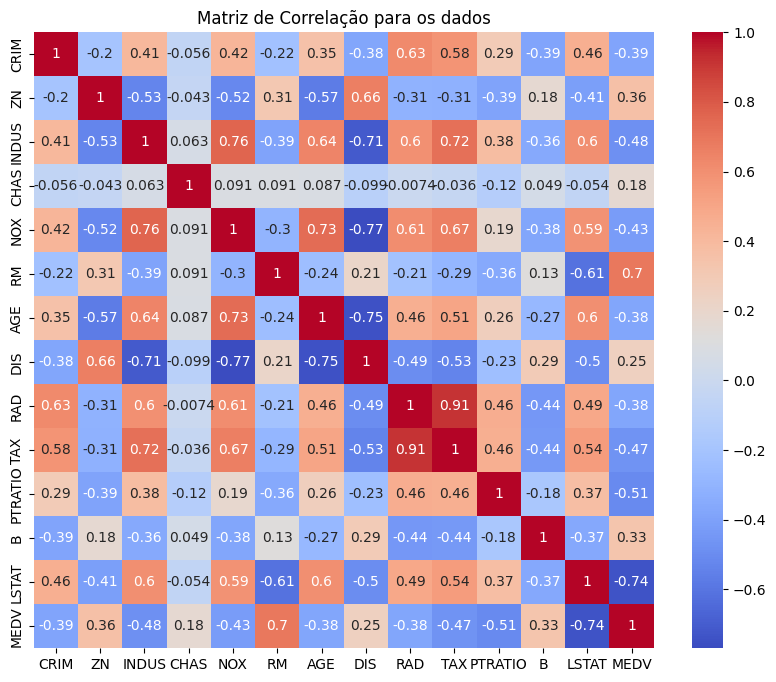

In [7]:
# Matriz de correlação
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação para os dados')
plt.show()

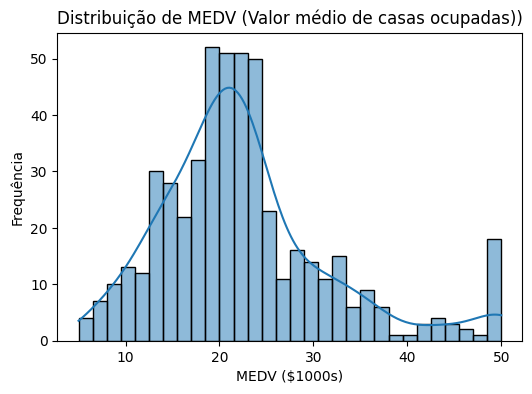

In [8]:
# Distribuição da nossa variável álvo (MEDV)
plt.figure(figsize=(6, 4))
sns.histplot(df['MEDV'], bins=30, kde=True)
plt.title('Distribuição de MEDV (Valor médio de casas ocupadas))')
plt.xlabel('MEDV ($1000s)')
plt.ylabel('Frequência')
plt.show()

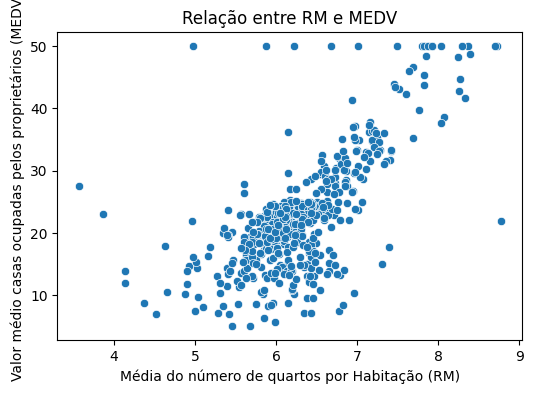

In [9]:
# Relações entre RM (número médio de cômodos) e MEDV
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RM', y='MEDV', data=df)
plt.title('Relação entre RM e MEDV')
plt.xlabel('Média do número de quartos por Habitação (RM)')
plt.ylabel('Valor médio casas ocupadas pelos proprietários (MEDV)')
plt.show()

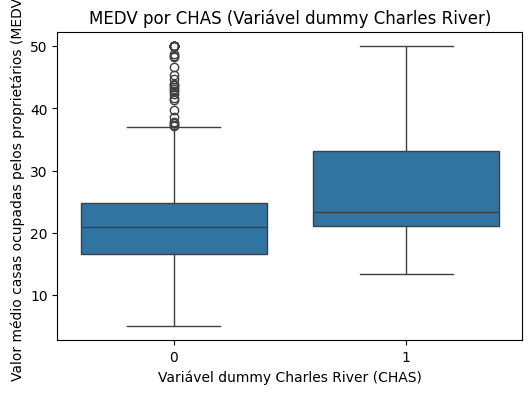

In [10]:
# Examinando o efeito de CHAS (Variável dummy Charles River) no MEDV
plt.figure(figsize=(6, 4))
sns.boxplot(x='CHAS', y='MEDV', data=df)
plt.title('MEDV por CHAS (Variável dummy Charles River)')
plt.xlabel('Variável dummy Charles River (CHAS)')
plt.ylabel('Valor médio casas ocupadas pelos proprietários (MEDV)')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assumindo 'MEDV' como variável álvo e o restante como preditores
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Separando o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## Normalização de dados

Para o conjunto de dados Boston Housing, a normalização pode ajudar a melhorar o desempenho do modelo, especialmente para algoritmos que são sensíveis à escala dos dados, como Support Vector Machines, K-nearest Neighbors e modelos que usam gradiente descendente para otimização. Duas técnicas comuns de normalização são:

- **Min-Max Scaling**: Esta técnica redimensiona os dados para um intervalo fixo, geralmente de 0 a 1. É útil quando você precisa normalizar o intervalo dos recursos.

- **Padronização (Normalização de pontuação Z)**: Esta técnica redimensiona os dados para que tenham uma média de 0 e um desvio padrão de 1. É útil em muitos cenários, especialmente quando o algoritmo assume que os recursos de entrada são distribuídos normalmente.

Para o conjunto de dados Boston Housing, a padronização é frequentemente preferida, pois lida bem com recursos que têm diferentes unidades de medida e escalas.


In [12]:
from sklearn.preprocessing import StandardScaler

# Iniciando o StandardScaler
scaler = StandardScaler()

# Ajuste nos dados de treinamento e transforme os dados de treinamento e teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converta matrizes dimensionadas de volta para DataFrame para maior conveniência
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Regressão Linear

In [13]:
from sklearn.linear_model import LinearRegression

# Inicializando e ajustando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Raiz do erro quadrático médio
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Erro Absoluto Médio (MAE): 3.1890919658878416
Erro Quadrático Médio (MSE): 24.291119474973538
Raiz do erro quadrático médio (RMSE): 4.928602182665339
R^2 Score: 0.6687594935356317


## Regressão Ridge

In [14]:
from sklearn.linear_model import Ridge

# Inicializar e treinar o modelo de regressão de Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predição no conjunto de teste
y_pred = ridge_model.predict(X_test)

# Métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Erro Absoluto Médio (MAE): 3.1329474278055325
Erro Quadrático Médio (MSE): 24.47719122770865
Raiz do erro quadrático médio (RMSE): 4.9474428978724605
R^2 Score: 0.6662221670168522


## Regressão Lasso

In [15]:
from sklearn.linear_model import Lasso

# Inicializar e treinar o modelo de regressão Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Predição no conjunto de teste
y_pred = lasso_model.predict(X_test)

# Métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Erro Absoluto Médio (MAE): 3.2535397673681614
Erro Quadrático Médio (MSE): 24.409489761299707
Raiz do erro quadrático médio (RMSE): 4.940596093721861
R^2 Score: 0.6671453631686304


## ElasticNet

In [16]:
from sklearn.linear_model import ElasticNet

# Inicializar e treinar o modelo ElasticNet
elastic_net_model = ElasticNet(random_state=42)
elastic_net_model.fit(X_train, y_train)

# Predição no conjunto de teste
y_pred = elastic_net_model.predict(X_test)

# Métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Erro Absoluto Médio (MAE): 3.244000641536975
Erro Quadrático Médio (MSE): 23.96873321020479
Raiz do erro quadrático médio (RMSE): 4.89578729217322
R^2 Score: 0.6731556429073877


## Regressão do vetor de suporte (SVR)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Inicializar e treinar o modelo de regressão de vetores de suporte com dimensionamento de recursos
svr_model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr_model.fit(X_train, y_train)

# Predição no conjunto de teste
y_pred = svr_model.predict(X_test)

# Métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Erro Absoluto Médio (MAE): 2.7398756050247868
Erro Quadrático Médio (MSE): 25.600625317621695
Raiz do erro quadrático médio (RMSE): 5.059706050515356
R^2 Score: 0.6509027052149569


## Por que dimensionar recursos para SVR?

O dimensionamento de recursos foi realizado antes do treinamento do modelo Support Vector Regression (SVR) devido à natureza do algoritmo em si. O SVR, como muitos algoritmos de aprendizado de máquina, é sensível ao intervalo de recursos de entrada. Aqui estão os motivos pelos quais o dimensionamento de recursos é essencial para o SVR:

- **Sensibilidade a escalas de recursos**: o SVR usa a distância euclidiana entre pontos de dados em sua função objetiva. Se um recurso tiver um intervalo muito grande em comparação com outros, ele dominará o cálculo da distância, levando a resultados distorcidos. O dimensionamento garante que todos os recursos contribuam igualmente para o cálculo da distância.

- **Eficiência de otimização**: os algoritmos de otimização do modelo SVR convergem mais rápido quando os recursos estão em escalas semelhantes. Sem dimensionamento, recursos com intervalos maiores podem desacelerar o processo de treinamento e levar a tempos de convergência mais longos ou convergência para soluções subótimas.

- **Impacto da regularização**: o SVR geralmente inclui termos de regularização para evitar overfitting. A eficácia do termo de regularização pode ser desproporcionalmente afetada por características de diferentes escalas, tornando crucial dimensionar as características para uma regularização equilibrada em todas as dimensões.

## Decision Tree Regressor

In [18]:
from sklearn.tree import DecisionTreeRegressor

# Iniciar e treinar o Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predição no teste
y_pred = tree_model.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Erro Absoluto Médio (MAE): 2.394117647058824
Erro Quadrático Médio (MSE): 10.416078431372549
Raiz do erro quadrático médio (RMSE): 3.2273949915330395
R^2 Score: 0.8579634380978161


## Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Iniciar e treinar o Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predição no teste
y_pred = random_forest_model.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Erro Absoluto Médio (MAE): 2.0395392156862746
Erro Quadrático Médio (MSE): 7.901513892156864
Raiz do erro quadrático médio (RMSE): 2.8109631609391226
R^2 Score: 0.8922527442109116


## Gradient Boosting Regressor

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Iniciar e treinar Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Predição
y_pred = gradient_boosting_model.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erro Absoluto Médio (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Erro Absoluto Médio (MAE): 1.9122427713612915
Erro Quadrático Médio (MSE): 6.208861361528038
Raiz do erro quadrático médio (RMSE): 2.491758688462436
R^2 Score: 0.9153342280466539


## Vamos ver todos juntos

As 3 células a seguir são usadas para comparar os modelos de regressão que construímos antes. Isso é feito por meio de várias etapas:

1. **Definir modelos:** Inicializamos um dicionário chamado `models` contendo vários modelos de regressão, incluindo regressão linear, Ridge, Lasso, ElasticNet, regressão de vetores de suporte (SVR), Decision Tree, Random Forest Regressor, e Gradient Boosting Regressor. O modelo SVR é dimensionado especificamente usando `StandardScaler` para padronizar recursos removendo a média e dimensionando para variância unitária.

2. **Avaliar modelos:** O código faz um loop em cada modelo, ajustando-os em dados de treinamento (`X_train`, `y_train`) e prevendo resultados em dados de teste (`X_test`). Em seguida, ele calcula o erro absoluto médio (MAE), o erro quadrático médio (MSE), o erro quadrático médio raiz (RMSE) e a pontuação R^2 para cada modelo, armazenando essas métricas em um dicionário `metrics_results`.

3. **Visualização:** Dois gráficos são gerados para comparar visualmente os desempenhos dos modelos. O primeiro gráfico mostra MAE, MSE e RMSE para cada modelo, fornecendo insights sobre seus erros de previsão. O segundo gráfico foca na pontuação R^2, que indica o quão bem os modelos capturam a variância da variável alvo. Gráficos de barras são usados ​​para visualização clara e comparativa.

In [21]:
# Definindo os modelos
models = {
    'Regressão Linear': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regresor': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Espaço reservado para os resultados das métricas
metrics_results = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

# Calcular cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_results['Model'].append(name)
    metrics_results['MAE'].append(mean_absolute_error(y_test, y_pred))
    metrics_results['MSE'].append(mean_squared_error(y_test, y_pred))
    metrics_results['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_pred)))
    metrics_results['R2'].append(r2_score(y_test, y_pred))

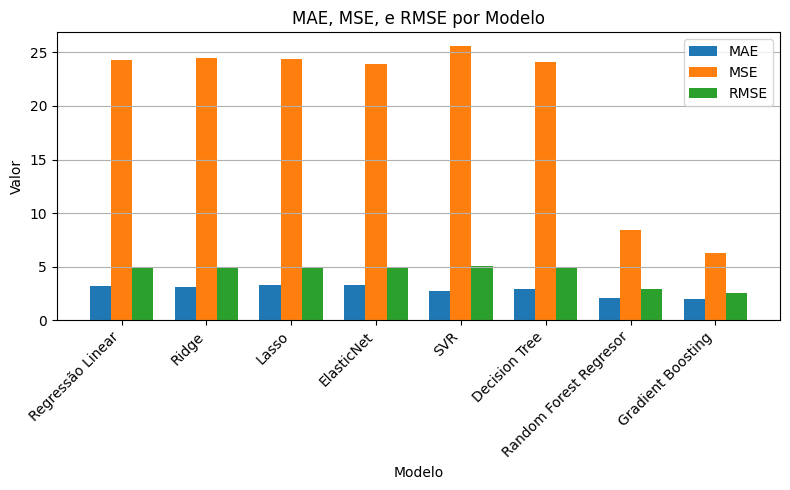

In [22]:
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.25
index = np.arange(len(models))

for i, metric in enumerate(['MAE', 'MSE', 'RMSE']):
    ax.bar(index + i * bar_width,
           metrics_results[metric],
           bar_width,
           label=metric)

ax.set_xlabel('Modelo')
ax.set_ylabel('Valor')
ax.set_title('MAE, MSE, e RMSE por Modelo')
ax.set_xticks(index +
              bar_width)  # Ajustado para centralizar os ticks entre o grupo de barras
ax.set_xticklabels(metrics_results['Model'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.grid(axis='y')
plt.show()

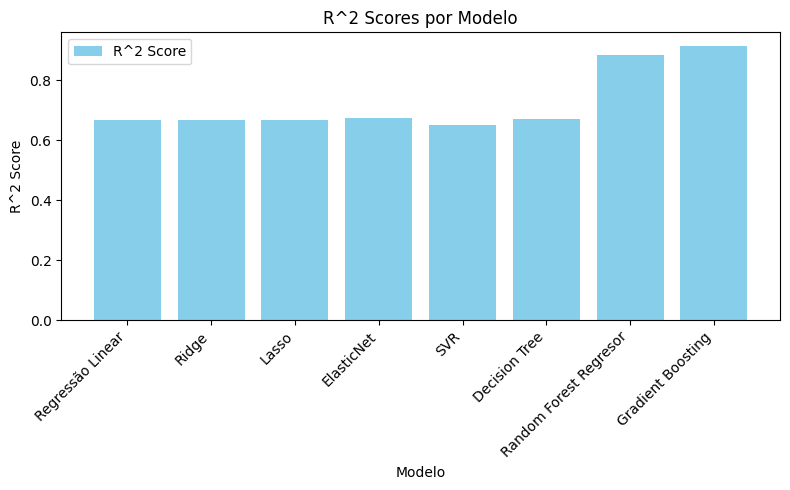

In [23]:
fig, ax = plt.subplots(figsize=(8, 5))

bar_positions = np.arange(len(metrics_results['Model']))
ax.bar(bar_positions,
       metrics_results['R2'],
       color='skyblue',
       label='R^2 Score')

ax.set_xlabel('Modelo')
ax.set_ylabel('R^2 Score')
ax.set_title('R^2 Scores por Modelo')
ax.set_xticks(bar_positions)  # Definindo explicitamente as posições dos ticks
ax.set_xticklabels(metrics_results['Model'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

In [24]:
#O melhor foi o GradientBoosting, que possui diversos parâmetros, podemos ver
#aqui: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
# Não colocamos nenhum para eles anteriormente, então ficou o default:
# n_estimators = 100
# learning_rate = 0.1
# max_depth = 3
# min_samples_split = 2
# para saber qual melhor valor, temos que testar vários e escolher
# GridSearchCV, faz isso! https://www.mygreatlearning.com/blog/gridsearchcv/
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



from sklearn.model_selection import GridSearchCV
import time
import joblib

# Definindo os parâmetros do grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6]
}

# Iniciando o GridSearchCV
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1)

# Medindo o tempo que levará para a pesquisa no grid
start_time = time.time()

# Realizando a pesquisa no grid
grid_search.fit(X_train, y_train)

# Calculando tempo passado
elapsed_time = time.time() - start_time

# Melhores parâmetros e melhores valores
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predição no teste usando o melhor modelo encontrado
y_pred = grid_search.predict(X_test)

# Calculando métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)



Fitting 5 folds for each of 192 candidates, totalling 960 fits


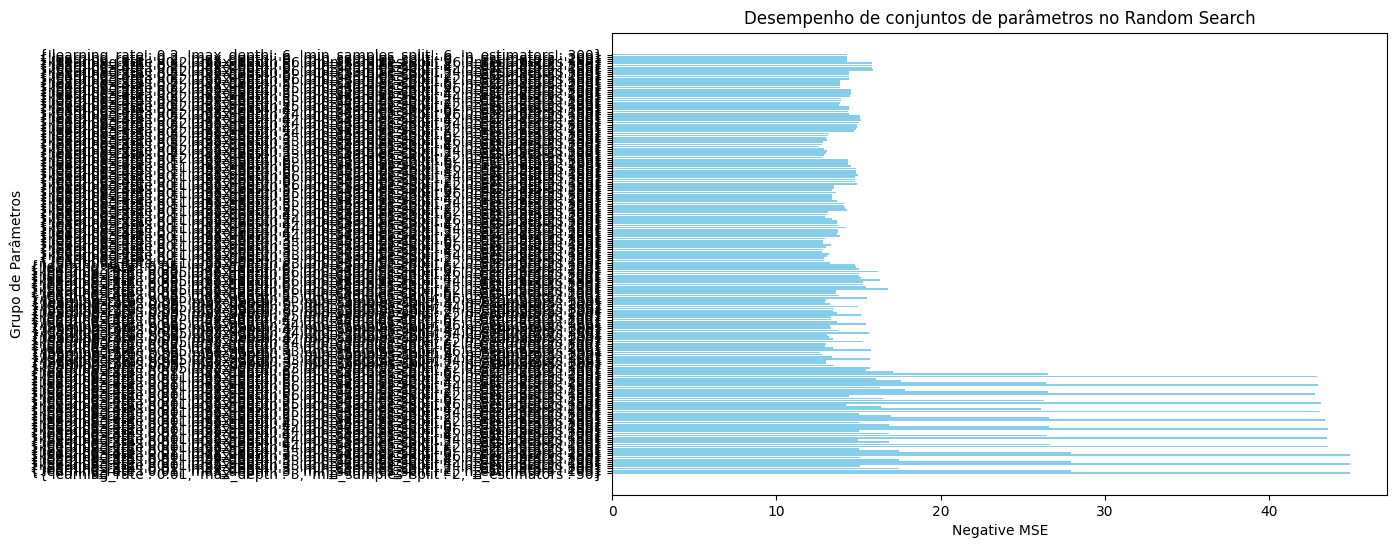

In [25]:
# Gráfico das saídas dos vários parâmetros (veja a quantidade absurda!)
results = grid_search.cv_results_
mean_test_scores = -results['mean_test_score']
params = [str(param) for param in results['params']]

plt.figure(figsize=(10, 6))
plt.barh(params, mean_test_scores, color='skyblue')
plt.xlabel('Negative MSE')
plt.ylabel('Grupo de Parâmetros')
plt.title('Desempenho de conjuntos de parâmetros no Random Search')
plt.show()

In [26]:
print(f"Melhores Parâmetros: {best_params}")
print(f"Melhores valores (MSE): {best_score}")
print(f"Erro Absoluto Médio (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse}")
print(f"R^2 Score: {r2}")
print(f"Tempo total decorrido para pesquisa em grade: {elapsed_time} segundos")

Melhores Parâmetros: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
Melhores valores (MSE): -12.579331231930643
Erro Absoluto Médio (MAE): 1.768828945927315
Erro Quadrático Médio (MSE): 5.427450486871088
Raiz do erro quadrático médio (RMSE): 2.329688924914888
R^2 Score: 0.9259897655217713
Tempo total decorrido para pesquisa em grade: 82.12992715835571 segundos


## Justificativa por trás do uso do erro quadrático médio negativo (MSE negativo) na pesquisa do grid

Ao executar a otimização de hiperparâmetros com pesquisa do grid no scikit-learn, frequentemente usamos métricas de pontuação para avaliar o desempenho de diferentes combinações de parâmetros. A escolha de "Negative Mean Squared Error (Negative MSE)" como uma métrica de pontuação pode parecer contraintuitiva a princípio, mas há uma razão prática para seu uso:

### Objetivo de otimização

A busca no grid do Scikit-learn (`GridSearchCV`) visa *maximizar* a métrica de pontuação especificada. Como muitas métricas de regressão (como MSE) são naturalmente enquadradas como algo a ser minimizado (você quer que o erro seja o menor possível), usar MSE diretamente entraria em conflito com o objetivo de maximização da busca no grid. Para alinhar com esse objetivo, usamos MSE negativo.

### Negative MSE: explicação

- **Erro Quadrado Médio (MSE)** mede a diferença quadrática média entre os valores previstos e reais. Um MSE menor indica um melhor ajuste do modelo, pois significa erros menores entre os valores previstos e reais.
- **MSE negativo** simplesmente pega o negativo dos valores do MSE. Essa transformação transforma um problema de minimização em um de maximização, encaixando-se na estrutura de busca no grid onde pontuações mais altas são melhores. Ao usar MSE negativo, a busca de grade pode operar sob seu comportamento de maximização padrão, selecionando os parâmetros do modelo que produzem a pontuação mais alta (menos negativa).

### Implicações para a seleção do modelo

Ao usar o MSE Negativo como métrica de pontuação, podemos utilizar eficientemente a busca no grid para encontrar os parâmetros de modelo ideais que minimizam o MSE, já que a busca no grid selecionará inerentemente o conjunto de parâmetros com a pontuação mais alta (ou o MSE menos negativo, que corresponde ao MSE real mais baixo).

O uso do MSE Negativo como métrica de pontuação é uma solução alternativa prática que adapta o objetivo de minimização de redução de erro na estrutura de maximização usada pela busca no grid do scikit-learn, permitindo uma otimização de modelo direta e eficaz.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


Melhores Parâmetros: {'n_estimators': 100, 'min_samples_split': 4, 'max_depth': 4, 'learning_rate': 0.1}
Melhores valores (MSE): -13.79660240986566
Erro Absoluto Médio (MAE): 1.9149312428221237
Erro Quadrático Médio (MSE): 7.016245414956372
Raiz do erro quadrático médio (RMSE): 2.6488196267311923
R^2 Score: 0.9043245130335442
Tempo total decorrido para pesquisa em grade: 5.208911657333374 segundos


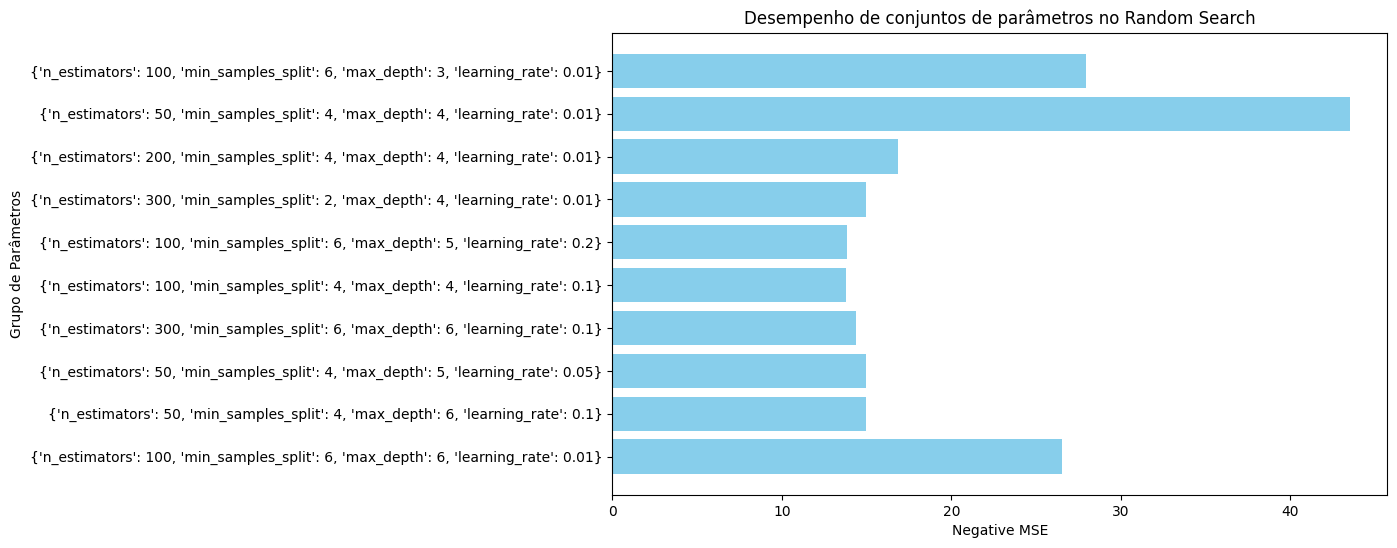

In [27]:
#O melhor foi o GradientBoosting, que possui diversos parâmetros, podemos ver
#aqui: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
# Não colocamos nenhum para eles anteriormente, então ficou o default:
# n_estimators = 100
# learning_rate = 0.1
# max_depth = 3
# min_samples_split = 2
# para saber qual melhor valor, temos que testar vários e escolher
# RandomSearch limita o total de testes, fazendo em menos tempo
# RandomizedSearchCV, faz isso também! https://didatica.tech/como-encontrar-a-melhor-performance-machine-learning/
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
# Diferença dos dois: https://didatica.tech/como-encontrar-a-melhor-performance-machine-learning/

from sklearn.model_selection import RandomizedSearchCV

# Definindo parâmetros
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6]
}

# Iniciando o RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Número de parâmetros colocados na amostra
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1)

# Medindo tempo da busca
start_time = time.time()

# Fazendo a busca
random_search.fit(X_train, y_train)

# calculando tempo passado
elapsed_time = time.time() - start_time

# Melhores parâmetros e valores
best_params = random_search.best_params_
best_score = random_search.best_score_

# Predição no teste com o melhor modelo encontrado
y_pred = random_search.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Melhores Parâmetros: {best_params}")
print(f"Melhores valores (MSE): {best_score}")
print(f"Erro Absoluto Médio (MAE): {mae}")
print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse}")
print(f"R^2 Score: {r2}")
print(f"Tempo total decorrido para pesquisa em grade: {elapsed_time} segundos")

# Gráfico das saídas dos vários parâmetros
results = random_search.cv_results_
mean_test_scores = -results['mean_test_score']
params = [str(param) for param in results['params']]

plt.figure(figsize=(10, 6))
plt.barh(params, mean_test_scores, color='skyblue')
plt.xlabel('Negative MSE')
plt.ylabel('Grupo de Parâmetros')
plt.title('Desempenho de conjuntos de parâmetros no Random Search')
plt.show()

## Entendendo o Random Search e a diferença do Grid Search

São dois métodos populares para otimização de hiperparâmetros.

### O que é Random Search?

É uma técnica de otimização de hiperparâmetros que seleciona combinações aleatórias de valores de hiperparâmetros de um intervalo especificado para cada hiperparâmetro. Essa abordagem avalia um número fixo de combinações aleatórias treinando o modelo com elas e selecionando a combinação que tem o melhor desempenho com base em uma métrica de desempenho escolhida.

### Como o Random Search funciona

1. **Defina o Espaço do Hiperparâmetro:** Ao contrário do Grid Search, que requer listas explícitas de valores para cada hiperparâmetro, o Random Search trabalha com distribuições (para hiperparâmetros contínuos) ou listas (para hiperparâmetros categóricos) para amostragem.
2. **Amostragem Aleatória:** Ela amostra aleatoriamente combinações de hiperparâmetros do espaço definido.
3. **Avaliação do Modelo:** Cada combinação selecionada aleatoriamente é usada para treinar um modelo, e seu desempenho é avaliado por meio de validação cruzada.
4. **Seleção dos Melhores Parâmetros:** Após avaliar um número predeterminado de combinações aleatórias, o conjunto de hiperparâmetros que produzem a melhor métrica de avaliação é escolhido.

### Random Search vs. Grid Search

- **Exploração do Espaço de Hiperparâmetros:** Grid Search explora sistematicamente todas as combinações possíveis na grade de hiperparâmetros definida, o que pode ser computacionalmente caro e demorado, especialmente com um grande número de hiperparâmetros ou grandes intervalos de valores. O Random Search, por outro lado, amostra um subconjunto de combinações, potencialmente explorando o espaço de forma mais eficiente.
- **Eficiência Computacional:** O Random Search pode ser mais computacionalmente eficiente do que o Grid Search, particularmente quando os valores ótimos de hiperparâmetros estão dentro de uma região estreita, porque não desperdiça tempo avaliando regiões pouco promissoras do espaço.
- **Desempenho:** Enquanto o Grid Search é exaustiva e garantida para encontrar a combinação ótima na grade, o Random Search tem uma chance (embora não garantida) de encontrar uma combinação quase ótima com muito menos iterações. Estudos mostraram que o Random Search pode ser surpreendentemente eficaz em comparação com o Grid Search, especialmente em espaços de alta dimensão.
- **Flexibilidade:** O Random Search permite a especificação de distribuições para hiperparâmetros contínuos, fornecendo uma abordagem mais flexível para explorar o espaço de hiperparâmetros.